Circle: 9
Triangle: 5
Square: 9
Hexagon: 13


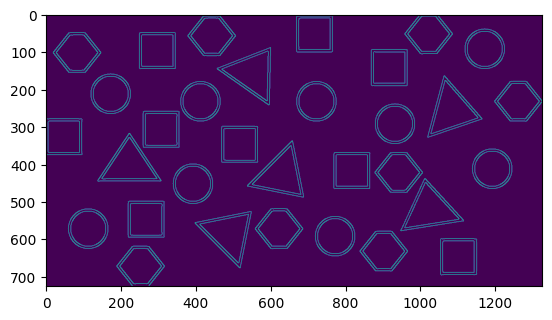

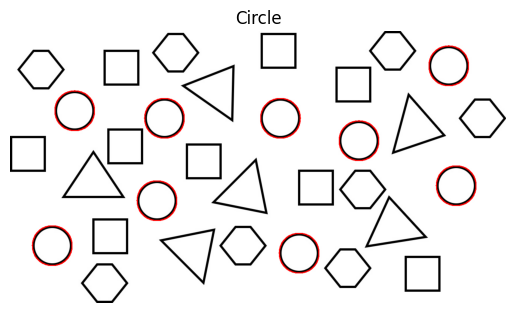

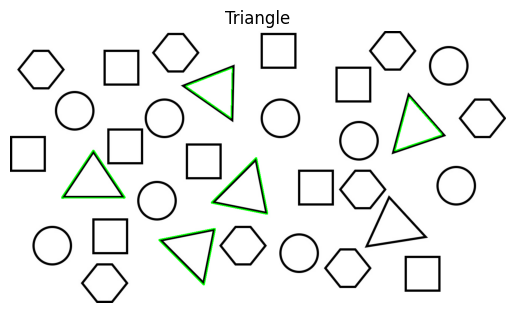

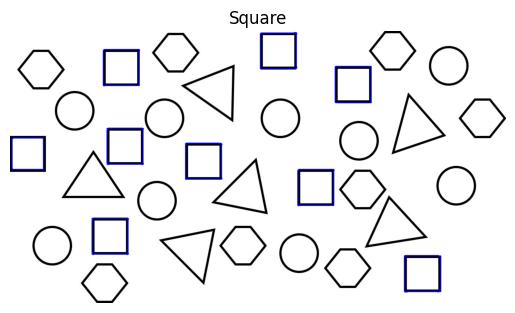

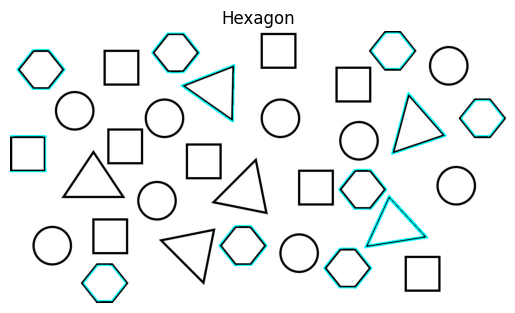

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = "shapes.jpg"
original_image = cv2.imread(image_path)
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(image, 60, 150)
plt.imshow(edges)
shape_counts = {
    "Circle": 0,
    "Triangle": 0,
    "Square": 0,
    "Hexagon": 0
}

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
images = {
    "Circle": original_image.copy(),
    "Triangle": original_image.copy(),
    "Square": original_image.copy(),
    "Hexagon": original_image.copy()
}

# Iterate over contours to detect shapes
for contour in contours:
    # Approximate the contour to reduce the number of points
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Determine the shape based on the number of vertices
    if len(approx) == 3:
        shape = "Triangle"
        shape_counts["Triangle"] += 1
        cv2.drawContours(images["Triangle"], [contour], -1, (0, 255, 0), 2)
    elif len(approx) == 4:
        shape = "Square"
        shape_counts["Square"] += 1
        cv2.drawContours(images["Square"], [contour], -1, (255, 0, 0), 2)
    elif len(approx) == 6:
        shape = "Hexagon"
        shape_counts["Hexagon"] += 1
        cv2.drawContours(images["Hexagon"], [contour], -1, (255, 255, 0), 2)
    else:
        # Check for circular shape
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        circularity = 4 * np.pi * (area / (perimeter * perimeter))
        if circularity > 0.8:
            shape = "Circle"
            shape_counts["Circle"] += 1
            cv2.drawContours(images["Circle"], [contour], -1, (0, 0, 255), 2)

# Display images for each shape
for shape, img in images.items():
    plt.figure()
    plt.title(shape)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

for shape, count in shape_counts.items():
    print(f"{shape}: {count}")

plt.show()